# Example of stimpy output parsing

## Design Only For the branch follows the git history

- pyvstim system master branch (legacy acquisition version)
- stimpy bitbucket master branch `fd94b91`
- stimpy github master branch (before implementing new logging feature) `8eb72b5`


- **DATA_ROOT** (e.g., 210315_YW006__2P_YW in *presentation* directory)
    - logs (.log, .riglog, .stimlog, .camlog)
    - protocol file (.prot)
    - preference file (.prefs)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from pprint import pprint

from stimpyp.parser import RiglogData

In [2]:
%load_ext autoreload
%autoreload

## Example for *.riglog* parsing

In [3]:
data_root = ...
rig = RiglogData(data_root)

In [4]:
# print config dict
pprint(rig.log_config)

{'codes': {'act0': 21,
           'act1': 22,
           'cam1': 6,
           'cam2': 7,
           'cam3': 8,
           'imaging': 1,
           'lap': 5,
           'lick': 3,
           'position': 2,
           'reward': 4,
           'screen': 0},
 'commit_hash': '6d30281',
 'fields': ('code', 'time received', 'duino time', 'value'),
 'source_version': 'stimpy-bit',
 'version': 0.3}


#### Show animal position and licking behaviors
- in begining of 50 sec

Text(0, 0.5, 'encoder value')

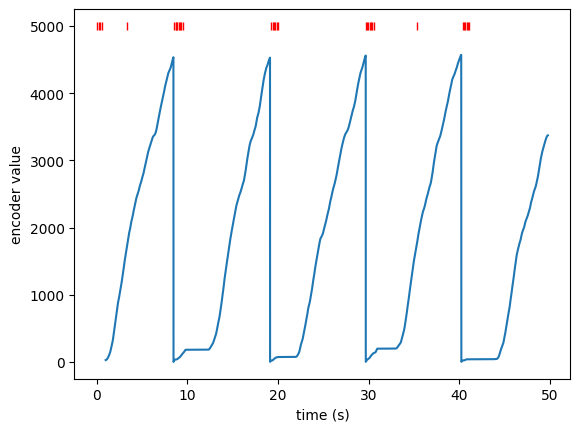

In [5]:
t = 50
position = rig.position_event.value
position_time = rig.position_event.time
pmask = position_time < t

lick_time = rig.lick_event.time
lick_value = np.full_like(lick_time, 5000)
lmask = lick_time < t

plt.plot(position_time[pmask], position[pmask])
plt.plot(lick_time[lmask], lick_value[lmask], 'r|')
plt.xlabel('time (s)')
plt.ylabel('encoder value')

## Example for *.stimlog* parsing

In [6]:
stimlog = rig.get_stimlog()

#### Get log info & header

In [7]:
print(stimlog.log_info)
pprint(stimlog.log_header)

{10: 'vstim', 20: 'stateMachine'}
{10: ['code',
      'presentTime',
      'iStim',
      'iTrial',
      'photo',
      'contrast',
      'ori',
      'sf',
      'phase',
      'stim_idx'],
 20: ['code',
      'elapsed',
      'cycle',
      'newState',
      'oldState',
      'stateElapsed',
      'trialType']}


#### Show the visual stimulation as dataframe

In [8]:
stimlog.get_visual_presentation_dataframe(stim_only=True)

presentTime,iStim,iTrial,photo,contrast,ori,sf,phase,stim_idx
f64,f64,f64,f64,f64,f64,f64,f64,f64
904.048038,69.0,0.0,0.0,1.0,270.0,0.16,0.066667,1.0
904.064764,69.0,0.0,0.0,1.0,270.0,0.16,0.133333,2.0
904.081463,69.0,0.0,0.0,1.0,270.0,0.16,0.2,3.0
904.098165,69.0,0.0,0.0,1.0,270.0,0.16,0.266667,4.0
904.114885,69.0,0.0,0.0,1.0,270.0,0.16,0.333333,5.0
…,…,…,…,…,…,…,…,…
2710.757272,45.0,4.0,0.0,1.0,270.0,0.04,11.733333,176.0
2710.773967,45.0,4.0,0.0,1.0,270.0,0.04,11.8,177.0
2710.790669,45.0,4.0,0.0,1.0,270.0,0.04,11.866667,178.0


#### Show the statemachine logging as dataframe

In [9]:
stimlog.get_state_machine_dataframe()

elapsed,cycle,newState,oldState,stateElapsed,trialType
f64,f64,f64,f64,f64,f64
902.601,0.0,1.0,0.0,902.601,0.0
904.614,0.0,2.0,1.0,2.012,0.0
907.64,0.0,0.0,2.0,3.026,0.0
907.64,0.0,1.0,0.0,0.0,0.0
909.653,0.0,2.0,1.0,2.012,0.0
…,…,…,…,…,…
2706.401,0.0,0.0,2.0,3.01,0.0
2706.401,0.0,1.0,0.0,0.0,0.0
2708.414,0.0,2.0,1.0,2.012,0.0


#### Foreach stimlulus pattern generator
- example usage of first 10 visual stims (grating stimuli)

In [10]:
for stim in stimlog.get_stim_pattern().foreach_stimulus(name=True):
    if stim.index <= 10:
        print(stim)

[INFO][24-08-02 10:18:36] - DIODE OFFSET avg: 0.6003181833333388s, std: 0.002609759366257817s

GratingStim(index=0, time=array([904.653   , 907.678877]), sf=0.16, tf=4, direction=270)
GratingStim(index=1, time=array([909.701   , 912.710125]), sf=0.08, tf=4, direction=90)
GratingStim(index=2, time=array([914.716   , 917.725085]), sf=0.08, tf=1, direction=150)
GratingStim(index=3, time=array([919.748   , 922.757043]), sf=0.08, tf=1, direction=60)
GratingStim(index=4, time=array([924.763   , 927.772046]), sf=0.08, tf=4, direction=240)
GratingStim(index=5, time=array([929.794   , 932.802951]), sf=0.04, tf=1, direction=0)
GratingStim(index=6, time=array([934.809   , 937.817828]), sf=0.16, tf=4, direction=330)
GratingStim(index=7, time=array([939.841   , 942.849867]), sf=0.04, tf=1, direction=150)
GratingStim(index=8, time=array([944.855   , 947.864007]), sf=0.04, tf=4, direction=120)
GratingStim(index=9, time=array([949.888  , 952.89694]), sf=0.16, tf=4, direction=300)
GratingStim(index=10,

## Example for *.prot* parsing

In [11]:
prot = rig.get_protocol()

In [12]:
# print options in dict
pprint(prot.options)  

{'blankDuration': 2,
 'controller': 'VisualExpController',
 'endBlankDuration': 900,
 'mask': 'None',
 'nTrials': 5,
 'shuffle': 'True',
 'startBlankDuration': 900,
 'stimulusType': 'gratings',
 'texture': 'sqr'}


In [13]:
# print stimulation dataframe
prot.visual_stimuli_dataframe

n,dur,xc,yc,c,sf,ori,flick,width,height,evolveParams
i64,i64,i64,i64,i64,f64,i64,i64,i64,i64,str
1,3,0,0,1,0.04,0,0,200,200,"""{'phase': ['linear', 1]}"""
2,3,0,0,1,0.04,30,0,200,200,"""{'phase': ['linear', 1]}"""
3,3,0,0,1,0.04,60,0,200,200,"""{'phase': ['linear', 1]}"""
4,3,0,0,1,0.04,90,0,200,200,"""{'phase': ['linear', 1]}"""
5,3,0,0,1,0.04,120,0,200,200,"""{'phase': ['linear', 1]}"""
…,…,…,…,…,…,…,…,…,…,…
68,3,0,0,1,0.16,210,0,200,200,"""{'phase': ['linear', 4]}"""
69,3,0,0,1,0.16,240,0,200,200,"""{'phase': ['linear', 4]}"""
70,3,0,0,1,0.16,270,0,200,200,"""{'phase': ['linear', 4]}"""


## Example for *.pref* parsing

In [ ]:
pref = rig.get_preferences()
pprint(pref) # print the preferences file TypedDict, not show due to private info